In [119]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [120]:
data = pd.read_csv('data_saved/data_final.csv', index_col=0)

Pour réaliser une classification supervisée d'images en utilisant Python, vous pouvez suivre plusieurs étapes, chacune d'entre elles étant encapsulée dans une fonction. Voici un exemple de ces étapes sous forme de fonctions :

1. **Chargement des données** : Cette étape consiste à charger les images et leurs étiquettes à partir de fichiers ou de répertoires. Vous pouvez utiliser des bibliothèques telles que OpenCV ou PIL pour cela.

In [121]:
# def describe_image_format(images):
#     # Vérifiez s'il y a au moins une image dans le tableau
#     if len(images) == 0:
#         return "Aucune image n'a été fournie."

#     # Obtenez la forme (shape) de la première image dans le tableau
#     image_shape = images[0].shape

#     # Vérifiez si l'image est en niveaux de gris (un seul canal)
#     if len(image_shape) == 2:
#         channels = "1 canal (niveaux de gris)"
#     else:
#         # Sinon, comptez le nombre de canaux de couleur (3 pour RVB)
#         num_channels = image_shape[2]
#         channels = f"{num_channels} canaux de couleur ("

#         # Ajoutez la description des canaux de couleur
#         if num_channels == 1:
#             channels += "niveaux de gris)"
#         elif num_channels == 3:
#             channels += "RGB - Rouge, Vert, Bleu)"
#         else:
#             channels += "Format non pris en charge)"

#     # Créez une description complète du format de l'image
#     description = f"({image_shape}) ({image_shape[1]} pixels de large, {image_shape[0]} pixels de haut) avec {channels}."

#     return description
def describe_image_format(images):
    # Vérifiez s'il y a au moins une image dans le tableau
    if len(images) == 0:
        print("Aucune image n'a été fournie.")
        return

    # Obtenez la forme (shape) de la première image dans le tableau
    image_shape = images[0].shape

    # Affichez la forme de l'image
    print(f"Format de l'image : {image_shape}")

    # Vérifiez si l'image est en niveaux de gris (un seul canal)
    if len(image_shape) == 2:
        channels = "1 canal (niveaux de gris)"
    else:
        # Sinon, comptez le nombre de canaux de couleur (3 pour RVB)
        num_channels = image_shape[2]
        channels = f"{num_channels} canaux de couleur ("

        # Ajoutez la description des canaux de couleur
        if num_channels == 1:
            channels += "niveaux de gris)"
        elif num_channels == 3:
            channels += "RGB - Rouge, Vert, Bleu)"
        else:
            channels += "Format non pris en charge)"

    # Affichez la description des canaux de couleur
    print(f"Description des canaux de couleur : {channels}")


In [122]:
def preprocess_images(data_pi):
    # Chemin vers le répertoire contenant les images
    image_dir = "C:/Users/Zbook/OpenClassRoom/Projet/Projet_6/data/Images"

    # Modèle de nom de fichier pour rechercher toutes les images (par exemple, tous les fichiers .jpg)
    image_pattern = os.path.join(image_dir, "*.jpg")

    # Liste pour stocker les images prétraitées
    preprocessed_images = []

    # Parcours de tous les fichiers correspondants au modèle de nom de fichier
    for image_path in glob.glob(image_pattern):
        # Charger l'image en niveaux de gris
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # CE1 : Utiliser des librairies spécialisées pour un premier traitement des images
        image = convert_to_grayscale(image)

        # CE2 : Présenter des opérations de retraitement d'images
        image = apply_gaussian_blur(image)

        # CE3 : Élaborer une fonction pour extraire des features à partir d'images (ORB, SIFT, SURF)
        orb_keypoints, orb_descriptors = extract_features_with_orb(image)

        # CE4 : Élaborer une fonction pour extraire des features via CNN Transfer Learning
        cnn_features = extract_features_with_cnn(image)

        # Ajoutez les images prétraitées et les features à la liste des résultats
        preprocessed_images.append({
            'image': image,
            'orb_keypoints': orb_keypoints,
            'orb_descriptors': orb_descriptors,
            'cnn_features': cnn_features
        })

    return preprocessed_images

In [123]:
# import os
# import cv2
# import numpy as np

# def load_data(data_dir):
#     images = []
#     labels = []

#     for class_folder in os.listdir(data_dir):
#         class_folder_path = os.path.join(data_dir, class_folder)
#         # print("class_folder_path : ",class_folder_path)
        
# #         cleaned_folder_name = class_folder_path.strip().replace("\r", "").replace("\n", "").replace('\', '\\')
#         cleaned_folder_name = class_folder_path.strip().replace("\r", "").replace("\n", "")#.replace("\\", "\\\\")

#         # print("cleaned_folder_name : ",cleaned_folder_name)        
#         # print(" os.path.isdir(class_folder_path) " ,os.path.isdir(cleaned_folder_name))
#         if os.path.isdir(data_dir.strip()):
#             # print("test passs*******************")
#             for image_file in os.listdir(data_dir):
#                 # print(image_file)
#                 # print(" i end swi " ,image_file.endswith('.jpg'))
#                 if image_file.endswith('.jpg'):
#                     image_path = os.path.join(cleaned_folder_name, image_file)
#                     print(image_path)
#                     image = cv2.imread(image_path)
#                     if image is not None:
#                         print(image)
#                         images.append(image)
#                         labels.append(class_folder)
    
#     return np.array(images), np.array(labels
# Importation des bibliothèques nécessaires
import os
import cv2  # OpenCV pour le traitement d'images
import numpy as np

# Fonction pour charger les données à partir d'un répertoire
# def load_data(data_dir):
def load_data(data_dir, target_size=(128, 128)):
    images = []  # Liste pour stocker les images
    labels = []  # Liste pour stocker les libellés (classes)

    # Parcourir chaque dossier de classe dans le répertoire des données
    for class_folder in os.listdir(data_dir):
        class_folder_path = os.path.join(data_dir, class_folder)
        
        # Nettoyer le nom du dossier en supprimant les caractères spéciaux indésirables
        cleaned_folder_name = class_folder_path.strip().replace("\r", "").replace("\n", "")

        # Vérifier si le chemin du dossier est un dossier valide
        if os.path.isdir(data_dir):
            # Parcourir chaque fichier image dans le dossier de classe
            for image_file in os.listdir(data_dir):
                # Vérifier si le fichier est une image au format .jpg
                if image_file.endswith('.jpg'):
                    image_path = os.path.join(data_dir, image_file)
                    try: 
#                         print(image_path)
                        # Lire l'image à l'aide d'OpenCV
                        image = cv2.imread(image_path)

                        # Vérifier si l'image a été lue avec succès
                        if image is not None:
                            # Redimensionner toutes les images à la même taille
                            image = cv2.resize(image, target_size)
                            images.append(image)  # Ajouter l'image à la liste des images
                            labels.append(class_folder)  # Ajouter le libellé (classe) correspondant
                        else:
                            # Gérer l'erreur si la lecture de l'image échoue
                            print(f"Erreur de lecture de l'image : {image_path}")
                    except Exception as e:
                       # Gérer toute autre exception
                       print(f"Erreur lors de la lecture de l'image {image_path} : {str(e)}")

    # Convertir les listes en tableaux NumPy pour une manipulation plus facile
    return np.array(images), np.array(labels)

# Explication du code :
# - La fonction `load_data` prend en entrée le chemin vers un répertoire contenant des données d'images.
# - Elle parcourt chaque dossier de classe dans le répertoire spécifié.
# - Pour chaque classe, elle parcourt tous les fichiers image au format .jpg.
# - Elle utilise OpenCV (cv2) pour lire chaque image.
# - Les images lues avec succès sont ajoutées à la liste `images`.
# - Les libellés (noms de classe) correspondant à chaque image sont ajoutés à la liste `labels`.
# - À la fin, la fonction renvoie deux tableaux NumPy : un tableau d'images et un tableau de libellés.


In [115]:
# data_dir = 'C:\\Users\\Zbook\\OpenClassRoom\\ProjetsGit\\Projet_6\\data\\Echantillon'

# images, labels = load_data(data_dir)
# print(images)

[[[[255 255 255]
   [252 255 255]
   [178 195 206]
   ...
   [251 253 253]
   [255 255 255]
   [252 255 255]]

  [[255 255 255]
   [251 254 254]
   [165 190 205]
   ...
   [255 255 251]
   [253 254 253]
   [255 255 253]]

  [[255 255 255]
   [252 255 254]
   [169 197 214]
   ...
   [251 255 255]
   [247 253 255]
   [255 255 251]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [152 179 200]
   [150 179 201]
   [148 176 202]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [154 177 199]
   [153 178 200]
   [153 179 200]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [158 177 198]
   [156 175 192]
   [179 195 206]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [6]:
# texte = "   Ceci est une chaîne avec des espaces en début et en fin   "
# texte_trim = texte.strip()

# print(texte_trim)  # Ceci est une chaîne avec des espaces en début et en fin


2. **Prétraitement des données** : Cette étape implique le redimensionnement, la normalisation et la division des données en ensembles d'entraînement et de test.

In [7]:
from sklearn.model_selection import train_test_split

def preprocess_data(df, labels, test_size=0.2, random_state=42):
    images = images / 255.0  # Normalisation
    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=test_size, random_state=random_state)
    
    return train_images, test_images, train_labels, test_labels

3. **Création du modèle CNN** : Vous pouvez créer un modèle CNN à l'aide de bibliothèques telles que TensorFlow et Keras.

In [8]:
import tensorflow as tf
from tensorflow import keras

def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [37]:
# Étape : Réglage du modèle (hypertuning)

def hyperparameter_tuning(X_train, y_train, X_val, y_val):
    # Effectuer un réglage hyperparamétrique pour améliorer les performances du modèle

    # Définir une grille de recherche pour les hyperparamètres (à personnaliser)
    param_grid = {
        'epochs': [10, 20, 30],  # Exemple d'hyperparamètre à régler
        'batch_size': [32, 64, 128]  # Exemple d'hyperparamètre à régler
    }

    # Créer un modèle CNN (à personnaliser avec votre architecture)
    model = create_cnn_model(X_train.shape[1:], num_classes)

    # Utiliser GridSearchCV pour rechercher les meilleures combinaisons d'hyperparamètres
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train, validation_data=(X_val, y_val))

    # Récupérer les meilleurs hyperparamètres
    best_params = grid_search.best_params_
    print("Meilleurs hyperparamètres:", best_params)

4. **Entraînement du modèle** : Cette étape consiste à entraîner le modèle sur les données d'entraînement.

In [19]:
def train_model(model, train_images, train_labels, epochs=10):
    # Créez une instance de LabelEncoder
    label_encoder = LabelEncoder()

    # Ajustez-le sur les étiquettes d'entraînement et transformez-les
    train_labels_encoded = label_encoder.fit_transform(train_labels)
    model.fit(train_images, train_labels_encoded, epochs=epochs, verbose=2)
    return model

5. **Évaluation du modèle** : Évaluez la performance du modèle sur les données de test.

In [22]:
def evaluate_model(model, test_images, test_labels):
    # Créez une instance de LabelEncoder
    label_encoder = LabelEncoder()

    # Ajustez-le sur les étiquettes d'entraînement et transformez-les
    test_labels_encoded = label_encoder.fit_transform(test_labels)
    
    test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded, verbose=2)
    print(f"Test accuracy: {test_accuracy*100:.2f}%")

In [ ]:


# ...



# Étape 7: Inference





# Étape 9: Conclusion

def main():
    # ...

    # Effectuer un réglage hyperparamétrique si nécessaire
    # best_params = hyperparameter_tuning(train_images, train_labels, val_images, val_labels)

    # Entraîner le modèle sur l'ensemble d'entraînement avec les meilleurs hyperparamètres
    # model = train_model(model, train_images, train_labels, best_params["epochs"], best_params["batch_size"])

    # Évaluer les performances du modèle sur l'ensemble de test
    test_predictions = predict_with_model(model, test_images)
    class_names = ['classe_1', 'classe_2', 'classe_3']  # Remplacez par les noms de vos classes
    visualize_results(test_labels, test_predictions, class_names)

if __name__ == "__main__":
    main()


6. **Prédiction** : Utilisez le modèle entraîné pour faire des prédictions sur de nouvelles images.


In [34]:
# def predict(model, image):
#     # Assurez-vous que l'image est prétraitée de la même manière que les données d'entraînement
#     image = image / 255.0  # Normalisation
# #     prediction = model.predict(np.expand_dims(image, axis=0))
#     prediction = model.predict(image)
  
#     return prediction

def predict(model, image):
    # Assurez-vous que l'image est prétraitée de la même manière que les données d'entraînement
    image = image / 255.0  # Normalisation des valeurs de pixel à l'échelle [0, 1]
    
    # Utilisez np.expand_dims pour ajouter une dimension de lot (batch dimension) à l'image
    # Le modèle attend généralement une forme (batch_size, hauteur, largeur, canaux)
#     image = np.expand_dims(image, axis=0)
    
    # Faites une prédiction en utilisant le modèle
    prediction = model.predict(image)
    
    return prediction


In [38]:
def predict_with_model(model, X_new):
    # Effectuer des prédictions sur de nouvelles données avec le modèle entraîné
    y_pred = model.predict(X_new)
    return y_pred

**Explication** :

- La fonction `predict` prend deux arguments : le modèle de réseau neuronal et une image que vous souhaitez classer à l'aide du modèle.

- Dans la première ligne de la fonction, nous normalisons l'image en divisant chaque valeur de pixel par 255.0. Cette normalisation est couramment utilisée pour que les valeurs des pixels se trouvent dans la plage [0, 1], ce qui est souvent attendu par les modèles de réseaux neuronaux.

- Ensuite, nous utilisons `np.expand_dims` pour ajouter une dimension de lot (batch dimension) à l'image. Les modèles de réseaux neuronaux en général attendent une entrée sous forme d'un lot d'images, même si vous ne traitez qu'une seule image. Cette opération modifie la forme de l'image de (hauteur, largeur, canaux) en (1, hauteur, largeur, canaux).

- Enfin, nous utilisons la méthode `predict` du modèle pour obtenir la prédiction pour l'image donnée. La prédiction est généralement un tableau de probabilités qui représente la probabilité que l'image appartienne à chaque classe dans le modèle.

L'utilité de cette fonction est de prendre une image en entrée, de la prétraiter conformément aux exigences du modèle (normalisation et ajout de la dimension de lot), puis d'obtenir une prédiction à partir du modèle entraîné. Cela vous permet de classer de nouvelles images à l'aide du modèle.

In [39]:
# Étape : Visualisation des résultats

def visualize_results(y_true, y_pred, class_names):
    # Créer des visualisations pour montrer les performances du modèle

    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('Étiquette réelle')
    plt.xlabel('Prédiction')

    # Rapport de classification
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Rapport de classification:\n", report)

7. **Fonction principal** 


In [116]:
def main():
#     # Spécifiez le répertoire des données
#     data_dir = 'C:\\Users\\Zbook\\OpenClassRoom\\ProjetsGit\\Projet_6\\data\\Echantillon'

#     # Chargez les données à partir du répertoire spécifié
#     images, labels = load_data(data_dir)

    # Vérifier si les étiquettes sont discrètes
    are_labels_discrete = all(isinstance(label, (int, str)) for label in labels)
    if are_labels_discrete:
        print("Les étiquettes sont discrètes (appropriées pour la classification).")
    else:
        print("Les étiquettes ne sont pas discrètes (inappropriées pour la classification).")

    # Vérifier le nombre de catégories distinctes
    unique_labels = set(labels)
    num_unique_labels = len(unique_labels)
    if num_unique_labels <= 10:
        print(f"Il y a {num_unique_labels} catégories distinctes : {unique_labels}")
    else:
        print(f"Il y a un grand nombre de catégories distinctes ({num_unique_labels}), ce qui peut rendre la classification difficile.")

    # Prétraitez les données en divisant-les en ensembles d'entraînement et de test
    train_images, test_images, train_labels, test_labels = preprocess_data(images, labels)

    # Vérifier la forme de l'entrée du modèle et le nombre de classes
    input_shape = train_images.shape[1:]
    num_classes = len(np.unique(labels))
    print(f"Forme de l'entrée du modèle : {input_shape}")
    print(f"Nombre de classes : {num_classes}")

    # Créez un modèle CNN
    model = create_cnn_model(input_shape, num_classes)

    # Entraînez le modèle sur les données d'entraînement
    model = train_model(model, train_images, train_labels)

    # Évaluez les performances du modèle sur les données de test
    test_predictions = evaluate_model(model, test_images, test_labels)
    
    # Vérifier si les prédictions sont valides
    if test_predictions is not None:
        print("Les prédictions du modèle sont valides(evaluate_model).")
    else:
        print("Les prédictions du modèle ne sont pas valides(evaluate_model).")

    # Effectuez des prédictions avec le modèle
    new_predictions = predict_with_model(model, test_images)

    # Vérifier si les nouvelles prédictions sont valides
    if new_predictions is not None:
        print("Les nouvelles prédictions du modèle sont valides.")
    else:
        print("Les nouvelles prédictions du modèle ne sont pas valides.")


    # from sklearn.preprocessing import LabelEncoder

    # Instancier un LabelEncoder
    label_encoder = LabelEncoder()

    # Adapter et transformer les étiquettes d'entraînement
    train_labels_encoded = label_encoder.fit_transform(train_labels)

    # Transformer les étiquettes de test
    test_labels_encoded = label_encoder.transform(test_labels)

    # Définissez les noms de classe pour l'affichage
    class_names = np.unique(labels)
    
    # Visualisez les résultats
#     visualize_results(test_labels_encoded, new_predictions, class_names)

if __name__ == "__main__":
    # Appelez la fonction principale
    main()


Les étiquettes sont discrètes (appropriées pour la classification).
Il y a un grand nombre de catégories distinctes (185), ce qui peut rendre la classification difficile.
Forme de l'entrée du modèle : (128, 128, 3)
Nombre de classes : 185
Epoch 1/10
856/856 - 186s - loss: 5.2785 - accuracy: 0.0041 - 186s/epoch - 217ms/step
Epoch 2/10
856/856 - 185s - loss: 5.2210 - accuracy: 0.0049 - 185s/epoch - 216ms/step
Epoch 3/10
856/856 - 196s - loss: 5.2209 - accuracy: 0.0057 - 196s/epoch - 229ms/step
Epoch 4/10
856/856 - 194s - loss: 5.2208 - accuracy: 0.0051 - 194s/epoch - 227ms/step
Epoch 5/10
856/856 - 191s - loss: 5.2208 - accuracy: 0.0054 - 191s/epoch - 223ms/step
Epoch 6/10
856/856 - 187s - loss: 5.2208 - accuracy: 0.0050 - 187s/epoch - 218ms/step
Epoch 7/10
856/856 - 196s - loss: 5.2208 - accuracy: 0.0057 - 196s/epoch - 229ms/step
Epoch 8/10
856/856 - 197s - loss: 5.2208 - accuracy: 0.0054 - 197s/epoch - 231ms/step
Epoch 9/10
856/856 - 197s - loss: 5.2208 - accuracy: 0.0050 - 197s/epoch 

In [45]:
# import os
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, models
# from tensorflow.keras.utils import to_categorical

def main():
#     # Spécifiez le répertoire des données
#     data_dir = 'C:\\Users\\Zbook\\OpenClassRoom\\ProjetsGit\\Projet_6\\data\\Echantillon'

#     # Chargez les données à partir du répertoire spécifié
#     images, labels = load_data(data_dir)
    are_labels_discrete = all(isinstance(label, (int, str)) for label in labels)
    if are_labels_discrete:
        print("Les étiquettes sont discrètes (appropriées pour la classification).")
    else:
        print("Les étiquettes ne sont pas discrètes (inappropriées pour la classification).")

    unique_labels = set(labels)
    num_unique_labels = len(unique_labels)
    if num_unique_labels <= 10:
        print(f"Il y a {num_unique_labels} catégories distinctes : {unique_labels}")
    else:
        print(f"Il y a un grand nombre de catégories distinctes ({num_unique_labels}), ce qui peut rendre la classification difficile.")

    
    # Prétraitez les données en divisant-les en ensembles d'entraînement et de test
    train_images, test_images, train_labels, test_labels = preprocess_data(images, labels)

    # Obtenir la forme de l'entrée du modèle et le nombre de classes
    input_shape = train_images.shape[1:]
    num_classes = len(np.unique(labels))

    # Créez un modèle CNN
    model = create_cnn_model(input_shape, num_classes)

    # Entraînez le modèle sur les données d'entraînement
    model = train_model(model, train_images, train_labels)

    # Évaluez les performances du modèle sur les données de test
    test_predictions = evaluate_model(model, test_images, test_labels)
    
    # Effectuez des prédictions avec le modèle
#     new_predictions = predict_with_model(model, new_images)
    new_predictions = predict_with_model(model, test_images)

    # Définissez les noms de classe pour l'affichage
    class_names = np.unique(labels)

    # Visualisez les résultats
    visualize_results(test_labels, new_predictions, class_names)

if __name__ == "__main__":
    # Appelez la fonction principale
    main()


Les étiquettes sont discrètes (appropriées pour la classification).
Il y a un grand nombre de catégories distinctes (72), ce qui peut rendre la classification difficile.
Epoch 1/10
130/130 - 29s - loss: 5.3452 - accuracy: 0.0123 - 29s/epoch - 222ms/step
Epoch 2/10
130/130 - 28s - loss: 4.2770 - accuracy: 0.0133 - 28s/epoch - 213ms/step
Epoch 3/10
130/130 - 28s - loss: 4.2768 - accuracy: 0.0140 - 28s/epoch - 213ms/step
Epoch 4/10
130/130 - 28s - loss: 4.2767 - accuracy: 0.0140 - 28s/epoch - 216ms/step
Epoch 5/10
130/130 - 28s - loss: 4.2766 - accuracy: 0.0135 - 28s/epoch - 216ms/step
Epoch 6/10
130/130 - 28s - loss: 4.2764 - accuracy: 0.0116 - 28s/epoch - 213ms/step
Epoch 7/10
130/130 - 28s - loss: 4.2763 - accuracy: 0.0140 - 28s/epoch - 214ms/step
Epoch 8/10
130/130 - 28s - loss: 4.2762 - accuracy: 0.0135 - 28s/epoch - 213ms/step
Epoch 9/10
130/130 - 28s - loss: 4.2762 - accuracy: 0.0145 - 28s/epoch - 214ms/step
Epoch 10/10
130/130 - 29s - loss: 4.2761 - accuracy: 0.0130 - 29s/epoch - 

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [41]:
# ca fonctionne 
def main():
    train_images, test_images, train_labels, test_labels = preprocess_data(images, labels)
    input_shape = train_images.shape[1:]
    num_classes = len(np.unique(labels))
    model = create_cnn_model(input_shape, num_classes)
    model = train_model(model, train_images, train_labels)
    evaluate_model(model, test_images, test_labels)
    predict(model, test_images)
#     # Effectuer un réglage hyperparamétrique si nécessaire
#     # best_params = hyperparameter_tuning(train_images, train_labels, val_images, val_labels)

#     # Entraîner le modèle sur l'ensemble d'entraînement avec les meilleurs hyperparamètres
#     # model = train_model(model, train_images, train_labels, best_params["epochs"], best_params["batch_size"])

#     # Évaluer les performances du modèle sur l'ensemble de test
#     test_predictions = predict_with_model(model, test_images)
# #     class_names = ['classe_1', 'classe_2', 'classe_3']  # Remplacez par les noms de vos classes
#     visualize_results(test_labels, test_predictions, num_classes)
    
if __name__ == "__main__":
    main()

Epoch 1/10
130/130 - 29s - loss: 4.7720 - accuracy: 0.0125 - 29s/epoch - 223ms/step
Epoch 2/10
130/130 - 28s - loss: 4.2769 - accuracy: 0.0142 - 28s/epoch - 218ms/step
Epoch 3/10
130/130 - 28s - loss: 4.2768 - accuracy: 0.0130 - 28s/epoch - 219ms/step
Epoch 4/10
130/130 - 29s - loss: 4.2766 - accuracy: 0.0145 - 29s/epoch - 222ms/step
Epoch 5/10
130/130 - 29s - loss: 4.2765 - accuracy: 0.0147 - 29s/epoch - 226ms/step
Epoch 6/10
130/130 - 28s - loss: 4.2764 - accuracy: 0.0154 - 28s/epoch - 218ms/step
Epoch 7/10
130/130 - 29s - loss: 4.2763 - accuracy: 0.0128 - 29s/epoch - 224ms/step
Epoch 8/10
130/130 - 30s - loss: 4.2762 - accuracy: 0.0147 - 30s/epoch - 229ms/step
Epoch 9/10
130/130 - 30s - loss: 4.2762 - accuracy: 0.0145 - 30s/epoch - 229ms/step
Epoch 10/10
130/130 - 29s - loss: 4.2760 - accuracy: 0.0150 - 29s/epoch - 221ms/step
33/33 - 2s - loss: 4.2843 - accuracy: 0.0077 - 2s/epoch - 52ms/step
Test accuracy: 0.77%
33/33 [==============================] - 2s 46ms/step


In [64]:
train_images, test_images, train_labels, test_labels = preprocess_data(images, labels)
describe_image_format(train_images)
describe_image_format(test_images)
input_shape = train_images.shape[1:]
num_classes = len(np.unique(labels))
model = create_cnn_model(input_shape, num_classes)
describe_image_format(train_images)
describe_image_format(test_images)
model = train_model(model, train_images, train_labels)
evaluate_model(model, test_images, test_labels)
describe_image_format(train_images)
describe_image_format(test_images)
# Prédire à l'aide du modèle sur l'ensemble de test
predictions = predict(model, test_images)

Format de l'image : (128, 128, 3)
Description des canaux de couleur : 3 canaux de couleur (RGB - Rouge, Vert, Bleu)
Format de l'image : (128, 128, 3)
Description des canaux de couleur : 3 canaux de couleur (RGB - Rouge, Vert, Bleu)
Format de l'image : (128, 128, 3)
Description des canaux de couleur : 3 canaux de couleur (RGB - Rouge, Vert, Bleu)
Format de l'image : (128, 128, 3)
Description des canaux de couleur : 3 canaux de couleur (RGB - Rouge, Vert, Bleu)
Epoch 1/10
130/130 - 29s - loss: 4.8377 - accuracy: 0.0109 - 29s/epoch - 222ms/step
Epoch 2/10
130/130 - 28s - loss: 4.2769 - accuracy: 0.0135 - 28s/epoch - 218ms/step
Epoch 3/10
130/130 - 28s - loss: 4.2767 - accuracy: 0.0150 - 28s/epoch - 219ms/step
Epoch 4/10
130/130 - 28s - loss: 4.2766 - accuracy: 0.0147 - 28s/epoch - 217ms/step
Epoch 5/10
130/130 - 28s - loss: 4.2765 - accuracy: 0.0140 - 28s/epoch - 215ms/step
Epoch 6/10
130/130 - 28s - loss: 4.2764 - accuracy: 0.0130 - 28s/epoch - 214ms/step
Epoch 7/10
130/130 - 28s - loss:

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_learning_curves(history):
    """
    Affiche les courbes d'apprentissage du modèle.

    Args:
        history: Historique de l'apprentissage renvoyé par model.fit.
    """
    # Afficher les courbes d'apprentissage
    plt.figure(figsize=(12, 4))

#     # Courbe de perte
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['loss'], label='Loss (entraînement)')
#     if 'val_loss' in history.history:
#         plt.plot(history.history['val_loss'], label='Loss (validation)')
#     plt.title('Courbe de perte')
#     plt.xlabel('Époques')
#     plt.ylabel('Perte')
#     plt.legend()

    # Courbe de précision (si disponible)
    if 'accuracy' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Précision (entraînement)')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Précision (validation)')
        plt.title('Courbe de précision')
        plt.xlabel('Époques')
        plt.ylabel('Précision')
        plt.legend()

    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Affiche la matrice de confusion.

    Args:
        y_true: Étiquettes réelles.
        y_pred: Étiquettes prédites par le modèle.
        class_names: Noms des classes.
    """
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Matrice de confusion')
    plt.show()

def plot_sample_predictions(images, true_labels, predicted_labels, class_names, num_samples=12):
    """
    Affiche des exemples d'images classées avec leurs étiquettes prédites.

    Args:
        images: Tableau d'images.
        true_labels: Étiquettes réelles.
        predicted_labels: Étiquettes prédites par le modèle.
        class_names: Noms des classes.
        num_samples: Nombre d'exemples à afficher.
    """
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_labels[i]]}\nPredicted: {class_names[i]}')
#         print (f'True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()


In [113]:
def plot_sample_predictions(images, true_labels, predicted_labels, class_names, num_samples=12):
    """
    Affiche des exemples d'images classées avec leurs étiquettes prédites.

    Args:
        images: Tableau d'images.
        true_labels: Étiquettes réelles.
        predicted_labels: Étiquettes prédites par le modèle.
        class_names: Noms des classes.
        num_samples: Nombre d'exemples à afficher.
    """
    plt.figure(figsize=(15, 5 * num_samples))  # Ajustez la hauteur pour afficher deux images par ligne
    for i in range(num_samples):
#         print("images[i] : " ,images[i])
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_labels[i]]}')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(images[i])
        plt.title(f'Predicted: {class_names[i]}')
        plt.axis('off')

    plt.tight_layout()  # Pour éviter que les titres ne se chevauchent
    plt.show()

# Utilisez la fonction pour afficher les échantillons
# plot_sample_predictions(test_images[:12], test_labels_encoded[:12], new_predictions[:12], class_names, num_samples=12)


images[i] :  [[[0.36470588 0.73333333 0.78431373]
  [0.39607843 0.75294118 0.81176471]
  [0.41176471 0.75686275 0.83137255]
  ...
  [0.62745098 0.62352941 0.8745098 ]
  [0.64313725 0.63921569 0.88235294]
  [0.61176471 0.60784314 0.85098039]]

 [[0.38039216 0.74901961 0.8       ]
  [0.41176471 0.77254902 0.82745098]
  [0.42352941 0.76862745 0.84313725]
  ...
  [0.56862745 0.56078431 0.82745098]
  [0.57254902 0.56078431 0.82352941]
  [0.51372549 0.50588235 0.76470588]]

 [[0.40392157 0.77254902 0.82352941]
  [0.43921569 0.79607843 0.85490196]
  [0.44313725 0.78823529 0.8627451 ]
  ...
  [0.47843137 0.4627451  0.76078431]
  [0.45490196 0.43921569 0.73333333]
  [0.35294118 0.3372549  0.62745098]]

 ...

 [[0.68627451 0.48627451 0.72156863]
  [0.61960784 0.43137255 0.6627451 ]
  [0.61568627 0.43137255 0.67843137]
  ...
  [0.43921569 0.4627451  0.8745098 ]
  [0.42352941 0.45882353 0.86666667]
  [0.39215686 0.42745098 0.83529412]]

 [[0.65098039 0.45490196 0.69803922]
  [0.63921569 0.44705882

images[i] :  [[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.98823529 1.         0.96470588]
  [0.99215686 1.         0.98431373]
  [0.99607843 0.99215686 1.        ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843

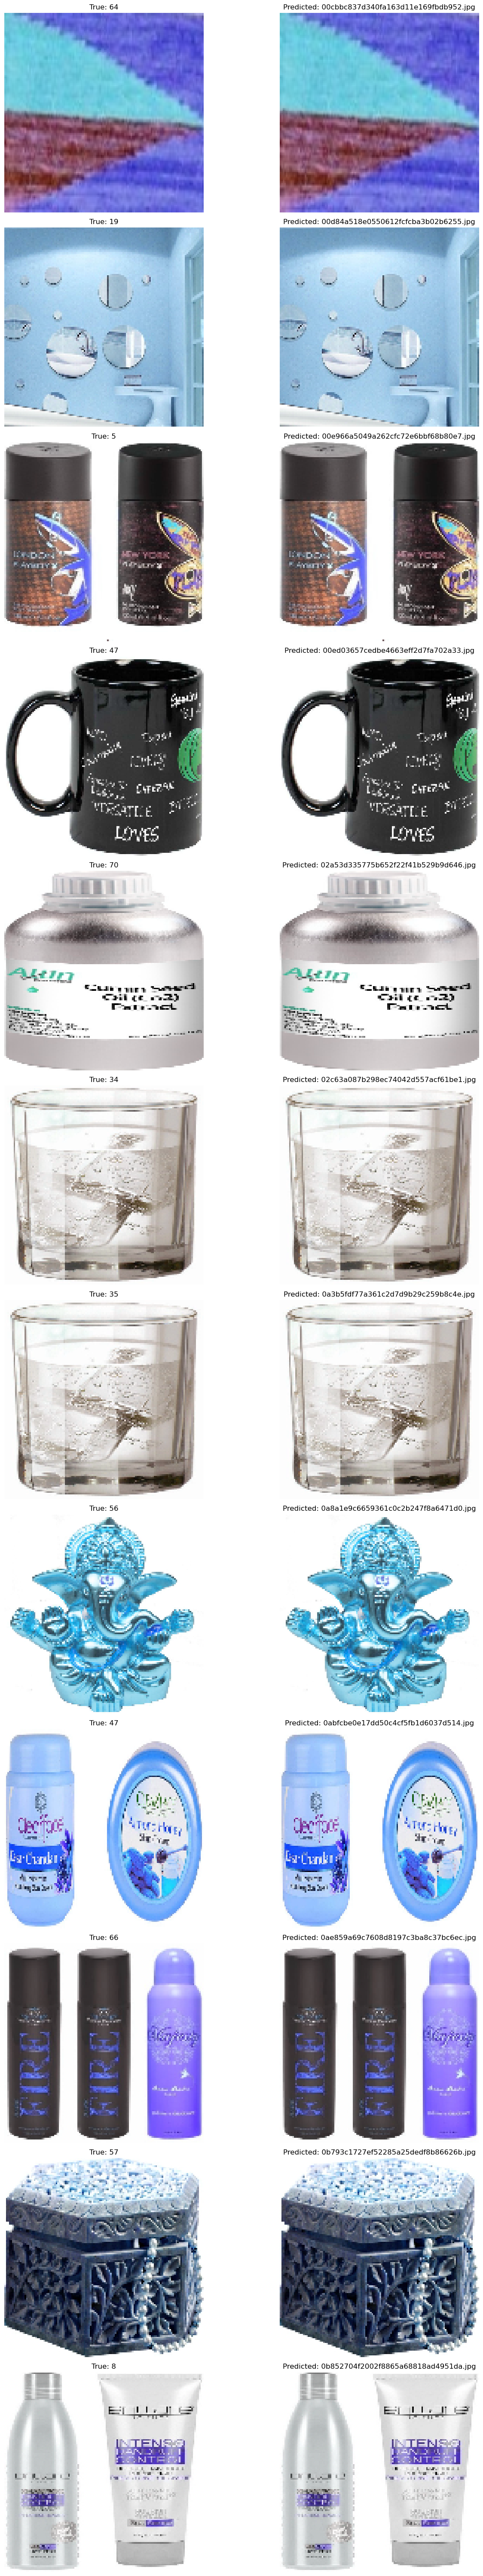

In [114]:
# Instancier un LabelEncoder
label_encoder = LabelEncoder()

# Adapter et transformer les étiquettes d'entraînement
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Transformer les étiquettes de test
test_labels_encoded = label_encoder.transform(test_labels)

# Après avoir obtenu les prédictions du modèle
plot_sample_predictions(test_images, test_labels_encoded, predicted_labels, class_names)


In [68]:
# Entraîner le modèle (assurez-vous que cette étape a été effectuée)
# model.fit(train_images, train_labels, epochs=10, validation_data=(images, labels))

# Afficher les métriques de l'historique
for metric_name, metric_value in model.history.history.items():
    print(f"{metric_name}: {metric_value}")


In [69]:
if hasattr(model.history, 'history') and 'loss' in model.history.history:
    print("Le paramètre 'loss' existe dans l'historique.")
else:
    print("Le paramètre 'loss' n'existe pas dans l'historique.")


Le paramètre 'loss' n'existe pas dans l'historique.


In [88]:
# class_names = np.unique(labels)
# # Après avoir obtenu les prédictions du modèle
# plot_learning_curves(model.history)  # Afficher les courbes d'apprentissage en utilisant le modèle.history
# # plot_confusion_matrix(test_labels, predictions, class_names)  # Afficher la matrice de confusion
# plot_sample_predictions(test_images, test_labels, predictions, class_names)  # Afficher des exemples d'images classées

In [82]:
test_labels_encoded = test_labels_encoded.astype(int)
predicted_labels = predictions.astype(int)

print("Type de true_labels_encoded:", test_labels_encoded.dtype)
print("Type de predicted_labels:", predicted_labels.dtype)

Type de true_labels_encoded: int32
Type de predicted_labels: int32


In [28]:
# # Importer les bibliothèques nécessaires
# import numpy as np

# # Importer les fonctions définies précédemment
# from load_data import load_data
# from preprocess_data import preprocess_data
# from create_cnn_model import create_cnn_model
# from train_model import train_model
# from evaluate_model import evaluate_model
# from predict import predict

# Définir la fonction principale
def main():
    # Spécifier le répertoire des données
    data_dir = 'C:\\Users\\Zbook\\OpenClassRoom\\ProjetsGit\\Projet_6\\data\\Echantillon'

    # Charger les données à partir du répertoire spécifié
    images, labels = load_data(data_dir)

    # Prétraiter les données en divisant-les en ensembles d'entraînement et de test
    train_images, test_images, train_labels, test_labels = preprocess_data(images, labels)

    # Obtenir la forme de l'entrée du modèle et le nombre de classes
    input_shape = train_images.shape[1:]
    num_classes = len(np.unique(labels))

    # Créer un modèle CNN
    model = create_cnn_model(input_shape, num_classes)

    # Entraîner le modèle sur les données d'entraînement
    model = train_model(model, train_images, train_labels)

    # Évaluer les performances du modèle sur les données de test
    evaluate_model(model, test_images, test_labels)

    # Prédire à l'aide du modèle sur l'ensemble de test
    predictions = predict(model, test_images)


# Vérifier si le script est exécuté en tant que programme principal
if __name__ == "__main__":
    # Appeler la fonction principale
    main()


Epoch 1/10
130/130 - 27s - loss: 5.5629 - accuracy: 0.0106 - 27s/epoch - 209ms/step
Epoch 2/10
130/130 - 27s - loss: 4.2771 - accuracy: 0.0118 - 27s/epoch - 208ms/step
Epoch 3/10
130/130 - 27s - loss: 4.2768 - accuracy: 0.0152 - 27s/epoch - 208ms/step
Epoch 4/10
130/130 - 27s - loss: 4.2767 - accuracy: 0.0123 - 27s/epoch - 210ms/step
Epoch 5/10
130/130 - 27s - loss: 4.2765 - accuracy: 0.0152 - 27s/epoch - 211ms/step
Epoch 6/10
130/130 - 27s - loss: 4.2765 - accuracy: 0.0133 - 27s/epoch - 208ms/step
Epoch 7/10
130/130 - 27s - loss: 4.2763 - accuracy: 0.0125 - 27s/epoch - 208ms/step
Epoch 8/10
130/130 - 27s - loss: 4.2762 - accuracy: 0.0125 - 27s/epoch - 208ms/step
Epoch 9/10
130/130 - 28s - loss: 4.2761 - accuracy: 0.0118 - 28s/epoch - 212ms/step
Epoch 10/10
130/130 - 27s - loss: 4.2761 - accuracy: 0.0125 - 27s/epoch - 208ms/step
33/33 - 2s - loss: 4.2839 - accuracy: 0.0087 - 2s/epoch - 46ms/step
Test accuracy: 0.87%


ValueError: in user code:

    File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 1037, 128, 128, 3)


Explication du code :

1. Les bibliothèques nécessaires sont importées, y compris `numpy` pour le support de tableaux et les fonctions définies précédemment.

2. La fonction principale `main()` est définie.

3. Le répertoire des données est spécifié dans `data_dir`.

4. Les données sont chargées à partir du répertoire spécifié à l'aide de la fonction `load_data()`.

5. Les données sont prétraitées en les divisant en ensembles d'entraînement et de test à l'aide de la fonction `preprocess_data()`.

6. La forme de l'entrée du modèle et le nombre de classes sont obtenus.

7. Un modèle CNN est créé à l'aide de la fonction `create_cnn_model()`.

8. Le modèle est entraîné sur les données d'entraînement à l'aide de la fonction `train_model()`.

9. Les performances du modèle sont évaluées sur les données de test à l'aide de la fonction `evaluate_model()`.

10. Une image est spécifiée, et la fonction `predict()` est appelée pour prédire une étiquette pour cette image à l'aide du modèle.

11. Enfin, on vérifie si le script est exécuté en tant que programme principal (`__name__ == "__main__"`) et si c'est le cas, la fonction `main()` est appelée pour exécuter toutes les étapes.

Ce code global permet de charger, prétraiter, créer, entraîner, évaluer et prédire à l'aide d'un modèle CNN sur un ensemble de données spécifié. Il est organisé de manière modulaire pour une meilleure lisibilité et maintenance du code.

Assurez-vous de personnaliser les chemins et les paramètres selon vos besoins spécifiques. Cette séquence d'étapes vous permettra de créer, d'entraîner et d'évaluer un modèle de classification supervisée d'images en utilisant un réseau de neurones convolutif.

## Essai de classification avec VG16

In [124]:
import os
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, decode_predictions
from keras.preprocessing.image import load_img, img_to_array, preprocess_input
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import optimizers

def load_data(data_dir):
    images = []
    labels = []

    for class_folder in os.listdir(data_dir):
        class_folder_path = os.path.join(data_dir, class_folder)

        if os.path.isdir(class_folder_path):
            for image_file in os.listdir(class_folder_path):
                if image_file.endswith('.jpg'):
                    image_path = os.path.join(class_folder_path, image_file)
                    image = cv2.imread(image_path)
                    if image is not None:
                        images.append(image)
                        labels.append(class_folder)

    return np.array(images), np.array(labels)

def preprocess_data(images, labels, test_size=0.2, random_state=42):
    images = images / 255.0
    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=test_size, random_state=random_state)
    
    return train_images, test_images, train_labels, test_labels

def create_custom_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def load_vgg16_model(num_classes):
    model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Add custom classification layers
    x = model.output
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # Create a new model
    custom_model = Model(inputs=model.input, outputs=predictions)
    
    return custom_model

def fine_tune_total(model):
    for layer in model.layers:
        layer.trainable = True

def feature_extraction(model):
    for layer in model.layers:
        layer.trainable = False

def fine_tune_partial(model, num_layers_to_freeze):
    for layer in model.layers[:num_layers_to_freeze]:
        layer.trainable = False

def train_model(model, train_images, train_labels, epochs=10, batch_size=32):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=2)
    return model

def evaluate_model(model, test_images, test_labels):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy: {test_accuracy*100:.2f}%")

def predict(model, image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    
    prediction = model.predict(img)
    return decode_predictions(prediction, top=3)[0]

def main():
    data_dir = 'path_to_data_directory'
    images, labels = load_data(data_dir)
    train_images, test_images, train_labels, test_labels = preprocess_data(images, labels)
    
    # Custom Model
    custom_model = create_custom_model(train_images.shape[1:], len(np.unique(labels)))
    fine_tune_total(custom_model)
    custom_model = train_model(custom_model, train_images, train_labels)
    evaluate_model(custom_model, test_images, test_labels)
    
    # VGG-16 Transfer Learning
    vgg16_model = load_vgg16_model(len(np.unique(labels)))
    fine_tune_partial(vgg16_model, 5)
    vgg16_model = train_model(vgg16_model, train_images, train_labels)
    evaluate_model(vgg16_model, test_images, test_labels)

if __name__ == "__main__":
    main()


ImportError: cannot import name 'preprocess_input' from 'keras.preprocessing.image' (C:\ProgramData\anaconda3\Lib\site-packages\keras\preprocessing\image\__init__.py)

In [153]:
data

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,X_TSNE,Y_TSNE,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
165,785b4383b12106dd172306d427d8f7b2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-cute-two-ca...,Rockmantra Cute Two Cats Ceramic Mug,MUGEAGGKFBTYPN4Z,499.0,349.0,785b4383b12106dd172306d427d8f7b2.jpg,False,Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,Coffee Mugs,Rockmantra Coffee Mugs,-19.910640,-17.716896,0
248,45d0af2c709de47268c80c35a117de44,2015-12-01 12:40:44 +0000,http://www.flipkart.com/malhar-niko-male-doll-...,Malhar Niko Male Doll Showpiece - 25 cm,SHIEY382SR75SXEY,6395.0,5436.0,45d0af2c709de47268c80c35a117de44.jpg,True,Buy Malhar Niko Male Doll Showpiece - 25 cm ...,No rating available,No rating available,Malhar,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Decor & Festive Needs,Showpieces,Malhar Showpieces,-16.189047,18.369432,9
310,64b463dc0b75ae40a848498c657041e6,2015-12-01 06:13:00 +0000,http://www.flipkart.com/linksys-smart-wi-fi-ro...,Linksys Smart Wi-Fi Router,RTRDZTF9DBT4CW8U,14999.0,13500.0,64b463dc0b75ae40a848498c657041e6.jpg,True,Buy Linksys Smart Wi-Fi Router only for Rs. 0....,No rating available,No rating available,Linksys,"{""product_specification""=>[{""key""=>""Encryption...",Computers,Network Components,Routers,30.623508,14.635627,9
685,6b5cdfe68595fbcab0e05dc625d3d66a,2015-12-31 09:19:31 +0000,http://www.flipkart.com/richfeel-sunshield-spf...,Richfeel Sunshield - SPF 30 PA++,SNRE4F2GBWVF6UKR,299.0,224.0,6b5cdfe68595fbcab0e05dc625d3d66a.jpg,False,Flipkart.com: Buy Richfeel Sunshield - SPF 30 ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"",...",Beauty and Personal Care,Body and Skin Care,Face Care,0.160292,-26.339520,0
843,e86daf9ebcdfc5c5dd088cdb7f8f8db6,2015-12-29 05:07:38 +0000,http://www.flipkart.com/epresent-mfan-1-fan-us...,Epresent Mfan 1 Fan USB USB Fan,USGEB3HTYWCYT2HY,269.0,219.0,e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg,False,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219...,No rating available,No rating available,Epresent,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,Laptop Accessories,USB Gadgets,-30.350624,-2.540635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,d0af95243e993331c4357fdf90dc4692,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-sandal-t...,Mxofere Combo Sandal Turmeric Almond Honey Jas...,CBKEBVA8DAKZKSGD,285.0,285.0,d0af95243e993331c4357fdf90dc4692.jpg,False,Mxofere Combo Sandal Turmeric Almond Honey Jas...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Beauty and Personal Care,Combos and Kits,Mxofere Combos and Kits,-12.826661,-19.193758,0
294,688bb32bf0d9b6e350d2c0912a3b7c9f,2016-03-02 16:58:31 +0000,http://www.flipkart.com/my-little-lambs-baby-g...,My Little Lambs Baby Girl's Gathered Dress,DREEG9JRZUZM5CBH,1550.0,1550.0,688bb32bf0d9b6e350d2c0912a3b7c9f.jpg,False,Key Features of My Little Lambs Baby Girl's Ga...,No rating available,No rating available,My Little Lambs,"{""product_specification""=>[{""value""=>""1 Dress""...",Baby Care,Infant Wear,Baby Girls' Clothes,17.867434,-22.939709,6
599,84b2e623a4a4327b88f7fe197a09be31,2016-01-07 00:54:41 +0000,http://www.flipkart.com/next-steps-baby-girl-s...,Next Steps Baby Girl's Layered Dress,DREEDFVG4HH3HFHT,599.0,356.0,84b2e623a4a4327b88f7fe197a09be31.jpg,False,Next Steps Baby Girl's Layered Dress\r\n ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""value""=>""1 Dress""...",Baby Care,Infant Wear,Baby Girls' Clothes,5.454907,-26.338058,0


In [149]:
data = pd.readatad_csv('data_saved/data_final.csv', index_col=0)

data.label.unique()

array([0, 9, 3, 8, 2, 1, 6, 4, 7, 5], dtype=int64)

In [1]:
import os
cwd = os.getcwd()
cwd

'/home/jovyan'

In [2]:
# %pip  install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/6e/1a/fbae76f4057b9bcdf9468025d7a8ca952dec14bfafb9fc0b1e4244ce212f/tensorflow_hub-0.15.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# debut test phil 

In [3]:


import pandas as pd

from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns

%cd /home/jovyan/work/

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

data = pd.read_csv('data_saved/data_final.csv', index_col=0)  # fichier CSV
data
# description 
# faire vecteur use , et autreord


/home/jovyan/work
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,X_TSNE,Y_TSNE,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
165,785b4383b12106dd172306d427d8f7b2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-cute-two-ca...,Rockmantra Cute Two Cats Ceramic Mug,MUGEAGGKFBTYPN4Z,499.0,349.0,785b4383b12106dd172306d427d8f7b2.jpg,False,Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,Coffee Mugs,Rockmantra Coffee Mugs,-19.910640,-17.716896,0
248,45d0af2c709de47268c80c35a117de44,2015-12-01 12:40:44 +0000,http://www.flipkart.com/malhar-niko-male-doll-...,Malhar Niko Male Doll Showpiece - 25 cm,SHIEY382SR75SXEY,6395.0,5436.0,45d0af2c709de47268c80c35a117de44.jpg,True,Buy Malhar Niko Male Doll Showpiece - 25 cm ...,No rating available,No rating available,Malhar,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Decor & Festive Needs,Showpieces,Malhar Showpieces,-16.189047,18.369432,9
310,64b463dc0b75ae40a848498c657041e6,2015-12-01 06:13:00 +0000,http://www.flipkart.com/linksys-smart-wi-fi-ro...,Linksys Smart Wi-Fi Router,RTRDZTF9DBT4CW8U,14999.0,13500.0,64b463dc0b75ae40a848498c657041e6.jpg,True,Buy Linksys Smart Wi-Fi Router only for Rs. 0....,No rating available,No rating available,Linksys,"{""product_specification""=>[{""key""=>""Encryption...",Computers,Network Components,Routers,30.623508,14.635627,9
685,6b5cdfe68595fbcab0e05dc625d3d66a,2015-12-31 09:19:31 +0000,http://www.flipkart.com/richfeel-sunshield-spf...,Richfeel Sunshield - SPF 30 PA++,SNRE4F2GBWVF6UKR,299.0,224.0,6b5cdfe68595fbcab0e05dc625d3d66a.jpg,False,Flipkart.com: Buy Richfeel Sunshield - SPF 30 ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"",...",Beauty and Personal Care,Body and Skin Care,Face Care,0.160292,-26.339520,0
843,e86daf9ebcdfc5c5dd088cdb7f8f8db6,2015-12-29 05:07:38 +0000,http://www.flipkart.com/epresent-mfan-1-fan-us...,Epresent Mfan 1 Fan USB USB Fan,USGEB3HTYWCYT2HY,269.0,219.0,e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg,False,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219...,No rating available,No rating available,Epresent,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,Laptop Accessories,USB Gadgets,-30.350624,-2.540635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,d0af95243e993331c4357fdf90dc4692,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-sandal-t...,Mxofere Combo Sandal Turmeric Almond Honey Jas...,CBKEBVA8DAKZKSGD,285.0,285.0,d0af95243e993331c4357fdf90dc4692.jpg,False,Mxofere Combo Sandal Turmeric Almond Honey Jas...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Beauty and Personal Care,Combos and Kits,Mxofere Combos and Kits,-12.826661,-19.193758,0
294,688bb32bf0d9b6e350d2c0912a3b7c9f,2016-03-02 16:58:31 +0000,http://www.flipkart.com/my-little-lambs-baby-g...,My Little Lambs Baby Girl's Gathered Dress,DREEG9JRZUZM5CBH,1550.0,1550.0,688bb32bf0d9b6e350d2c0912a3b7c9f.jpg,False,Key Features of My Little Lambs Baby Girl's Ga...,No rating available,No rating available,My Little Lambs,"{""product_specification""=>[{""value""=>""1 Dress""...",Baby Care,Infant Wear,Baby Girls' Clothes,17.867434,-22.939709,6
599,84b2e623a4a4327b88f7fe197a09be31,2016-01-07 00:54:41 +0000,http://www.flipkart.com/next-steps-baby-girl-s...,Next Steps Baby Girl's Layered Dress,DREEDFVG4HH3HFHT,599.0,356.0,84b2e623a4a4327b88f7fe197a09be31.jpg,False,Next Steps Baby Girl's Layered Dress\r\n ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""value""=>""1 Dress""...",Baby Care,Infant Wear,Baby Girls' Clothes,5.454907,-26.338058,0


In [11]:
data['wordVec']

Unnamed: 0
165    ((tf.Tensor(-0.067730024, shape=(), dtype=floa...
248    ((tf.Tensor(-0.06414181, shape=(), dtype=float...
310    ((tf.Tensor(-0.044443358, shape=(), dtype=floa...
685    ((tf.Tensor(-0.012013208, shape=(), dtype=floa...
Name: wordVec, dtype: object

In [13]:
data['wordVec'] = data['description'].apply(lambda x: np.array(embed([x])))

data['wordVec']

Unnamed: 0
165    [[-0.067730024, -0.06315183, -0.042630624, 0.0...
248    [[-0.06414181, -0.07305873, -0.001714834, -0.0...
310    [[-0.044443358, -0.07443124, -0.03536627, 0.00...
685    [[-0.012013208, -0.05354915, 0.018099755, 0.02...
843    [[-0.0013368431, -0.056438066, 0.04489999, 0.0...
                             ...                        
807    [[-0.062204257, -0.019860083, -0.05238314, 0.0...
294    [[-0.059437342, -0.05705344, -0.025516506, 0.0...
599    [[-0.02935109, -0.07136159, -0.018498385, 0.05...
581    [[-0.03251044, -0.06614853, -0.033808306, -0.0...
29     [[-0.048894737, -0.06322915, -0.05242882, -0.0...
Name: wordVec, Length: 1050, dtype: object

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

model =  KMeans(n_clusters=7, random_state=42, n_init="auto")
X_train, X_test, y_train, y_test = train_test_split(data['wordVec'], 
                                                    data['cat_lvl_1'],  
                                                    test_size=0.2, 
                                                    random_state=42)
model.fit(X_train,y_train) 



# Fin d'essai embed

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split

def prepare_labels_and_predictions(data, target_column, prediction_column):
    """
    Prépare les étiquettes réelles (y_true), les prédictions (y_pred) et les noms de classe (labels)
    à partir d'un DataFrame.

    Args:
    - data : DataFrame
        Le DataFrame contenant les données.
    - target_column : str
        Le nom de la colonne cible (étiquettes réelles).
    - prediction_column : str
        Le nom de la colonne contenant les prédictions.

    Returns:
    - y_true : list
        Liste des étiquettes réelles.
    - y_pred : list
        Liste des prédictions.
    - labels : list
        Liste des noms de classe uniques.
    """

    # Sélectionnez les colonnes pertinentes
    df = data[[target_column, prediction_column]]

    # Supprimez les lignes avec des valeurs manquantes dans les colonnes sélectionnées
    df = df.dropna()

    # Obtenez les étiquettes réelles et les prédictions
    y_true = df[target_column].tolist()
    y_pred = df[prediction_column].tolist()

    # Obtenez les noms de classe uniques à partir de la colonne cible
    labels = df[target_column].unique().tolist()

    return y_true, y_pred, labels

# Exemple d'utilisation
# Remplacez "data" par votre DataFrame et les noms de colonnes appropriés
data = pd.read_csv('data_saved/data_final.csv', index_col=0)  # fichier CSV
# data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv', index_col=0)  # fichier CSV
target_column = 'cat_lvl_1'  # Remplacez par le nom de votre colonne cible
prediction_column = 'cat_lvl_2'  # Remplacez par le nom de votre colonne de prédictions

y_true, y_pred, labels = prepare_labels_and_predictions(data, target_column, prediction_column)

# Maintenant, vous pouvez utiliser y_true, y_pred et labels pour évaluer vos prédictions.


In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Crée et affiche une matrice de confusion.

    Args:
    - y_true : tableau-like
        Les étiquettes de classe réelles.
    - y_pred : tableau-like
        Les étiquettes de classe prédites par le modèle.
    - labels : tableau-like
        Les noms des classes (étiquettes).

    Returns:
    - cm : tableau-like
        La matrice de confusion sous forme de tableau.
    """

    # Crée la matrice de confusion
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Crée une heatmap pour visualiser la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Classe Prédite')
    plt.ylabel('Classe Réelle')
    plt.title('Matrice de Confusion')
    plt.show()

    return cm


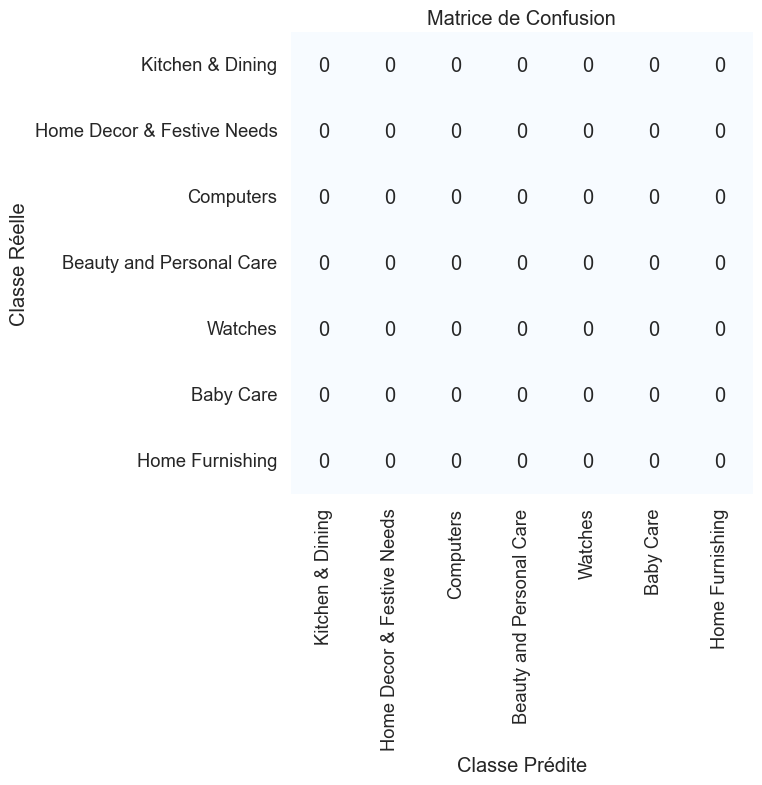

In [160]:
# Exemple d'utilisation
from sklearn.metrics import classification_report

# Crée et affiche la matrice de confusion
cm = plot_confusion_matrix(y_true, y_pred, labels)

# Affichez également un rapport de classification pour obtenir plus d'informations
# print(classification_report(y_true, y_pred, target_names=labels))


In [165]:
import sys
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Remplacez "data" par votre DataFrame et les noms de colonnes appropriés
data = pd.read_csv('data_saved/data_final.csv', index_col=0)  # fichier CSV
target_column = 'cat_lvl_1'  # Remplacez par le nom de votre colonne cible
prediction_column = 'cat_lvl_2'  # Remplacez par le nom de votre colonne de prédictions

def prepare_labels_and_predictions(data, target_column, prediction_column):
    y_true = data[target_column]
    y_pred = data[prediction_column]
    labels = data[target_column].unique()
    return y_true, y_pred, labels

y_true, y_pred, labels = prepare_labels_and_predictions(data, target_column, prediction_column)
    
# Crée la matrice de confusion
confusion_matrix = confusion_matrix(y_true, y_pred, labels=labels)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)

cm_display.plot()
plt.show()

# Enregistre la figure dans un fichier
plt.savefig('data/matrice_confusion.png')


C:\Users\Zbook\AppData\Local\Temp\ipykernel_4224\1277314006.py:30: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
